# Initialize

In [1]:
import os
import pandas as pd
import numpy as np

from IPython.display import display, Markdown
import math


In [2]:
working_directory = os.getcwd()
data_folder         = os.path.join(working_directory, "data"         )
sl_folder           = os.path.join(data_folder, "Streetlight-OD-Data")
intermediate_folder = os.path.join(working_directory, "intermediate" )
results_folder      = os.path.join(working_directory, "results"      )

#library with first value as Special Generator name and second column as filenam
data_filenames = [
                    ['Lagoon' ,'Lagoon_annual2019_bq-results-20220201-081835-i5k746dql5ia.csv' ],
                    ['Lagoon' ,'Lagoon_autumn2019_bq-results-20220201-073143-oh9m4mwwl2dj.csv' ],
                    ['Lagoon' ,'Lagoon_spring2019_bq-results-20220201-072820-47cgfz9wz02z.csv' ],
                    ['Lagoon' ,'Lagoon_summer2019_bq-results-20220201-072616-9d2k9c9si1pg.csv' ],
                    ['Lagoon' ,'Lagoon_winter2019_bq-results-20220201-073347-w5n85nfhx1mu.csv' ],
                    ['Airport','Airport_annual2019_bq-results-20220201-085222-3caehj8v9ukd.csv'],
                    ['Airport','Airport_autumn2019_bq-results-20220201-090128-68j9mj6yx76m.csv'],
                    ['Airport','Airport_spring2019_bq-results-20220201-090311-nsn82gujezhp.csv'],
                    ['Airport','Airport_summer2019_bq-results-20220201-090501-sr91wvgxvg0x.csv'],
                    ['Airport','Airport_winter2019_bq-results-20220201-090639-9ud7uk6citz5.csv']
                 ]

#only import these columns
colsToImport = ['origin_zone_name', 'destination_zone_name', 'day_type', 'day_part', 'data_period', 'o_d_traffic_sample_trip_counts', 'o_d_traffic_calibrated_trip_volume']

#streetlight fields
fnVolume = 'o_d_traffic_calibrated_trip_volume'
fnCounts = 'o_d_traffic_sample_trip_counts'

#zones for interzonal definition
data_zones = [
               ['Lagoon' ,'110200_0'],
               ['Airport','350060_1'],
               ['Airport','350060_2'],
               ['Airport','350060_3'],
               ['Airport','350060_4'],
               ['Airport','350060_5'],
               ['Airport','350060_6'],
               ['Airport','350060_7']
             ]

# Create the pandas DataFrame
dfDataZones = pd.DataFrame(data_zones, columns = ['SpecGen', 'ZoneName'])

#ease of use
daytype0 = '0: All Days (Mo-Su)'
daytype1 = '1: Weekday (Tu-Th)'
daytype2 = '2: Weekend Day (Sa-Su)'
dataper1 = '1. All year'
dataper2 = '2. Sep-Nov'
dataper3 = '3. Dec-Feb'
dataper4 = '4. Mar-May'
dataper5 = '5. Jun-Aug'
daypart0 = '0: All Day (12am-12am)'
daypart1 = '1: Early AM (12am-6am)'
daypart2 = '2: Peak AM (6am-9am)'
daypart3 = '3: Mid-Day (9am-3pm)'
daypart4 = '4: Peak PM (3pm-6pm)'
daypart5 = '5: Late PM (6pm-12am)'

print(working_directory)
print(data_folder)
print(sl_folder)
print(intermediate_folder)
print(results_folder)

display(dfDataZones)

#show numbers with commas
pd.options.display.float_format = '{:,.0f}'.format

e:\GitHub\TDM-Special-Generator-Streetlight
e:\GitHub\TDM-Special-Generator-Streetlight\data
e:\GitHub\TDM-Special-Generator-Streetlight\data\Streetlight-OD-Data
e:\GitHub\TDM-Special-Generator-Streetlight\intermediate
e:\GitHub\TDM-Special-Generator-Streetlight\results


,SpecGen,ZoneName
0,Lagoon,110200_0
1,Airport,350060_1
2,Airport,350060_2
3,Airport,350060_3
4,Airport,350060_4
5,Airport,350060_5
6,Airport,350060_6
7,Airport,350060_7


# Import Data

In [3]:
dfSLData = pd.DataFrame()

for f in data_filenames:
    print(f[1])
    dfTemp = pd.read_csv(os.path.join(sl_folder,f[1]), usecols=colsToImport)
    dfTemp['SpecGen'] = f[0]
    dfSLData = dfSLData.append(dfTemp)

display(dfSLData)

Lagoon_annual2019_bq-results-20220201-081835-i5k746dql5ia.csv
Lagoon_autumn2019_bq-results-20220201-073143-oh9m4mwwl2dj.csv
Lagoon_spring2019_bq-results-20220201-072820-47cgfz9wz02z.csv
Lagoon_summer2019_bq-results-20220201-072616-9d2k9c9si1pg.csv
Lagoon_winter2019_bq-results-20220201-073347-w5n85nfhx1mu.csv
Airport_annual2019_bq-results-20220201-085222-3caehj8v9ukd.csv
Airport_autumn2019_bq-results-20220201-090128-68j9mj6yx76m.csv
Airport_spring2019_bq-results-20220201-090311-nsn82gujezhp.csv
Airport_summer2019_bq-results-20220201-090501-sr91wvgxvg0x.csv
Airport_winter2019_bq-results-20220201-090639-9ud7uk6citz5.csv


,origin_zone_name,destination_zone_name,day_type,day_part,data_period,o_d_traffic_sample_trip_counts,o_d_traffic_calibrated_trip_volume,SpecGen
0,351145_0,110200_0,2: Weekend Day (Sa-Su),3: Mid-Day (9am-3pm),1. All year,13,4,Lagoon
1,110200_0,350074_0,2: Weekend Day (Sa-Su),5: Late PM (6pm-12am),1. All year,13,4,Lagoon
2,110237_0,110200_0,2: Weekend Day (Sa-Su),3: Mid-Day (9am-3pm),1. All year,13,4,Lagoon
3,110200_0,110209_0,2: Weekend Day (Sa-Su),3: Mid-Day (9am-3pm),1. All year,13,4,Lagoon
4,110200_0,110249_0,2: Weekend Day (Sa-Su),0: All Day (12am-12am),1. All year,65,18,Lagoon
...,...,...,...,...,...,...,...,...
118262,350060_1,50334_0,0: All Days (Mo-Su),0: All Day (12am-12am),3. Dec-Feb,3,1,Airport
118263,350957_0,350060_1,0: All Days (Mo-Su),1: Early AM (12am-6am),3. Dec-Feb,3,1,Airport
118264,350276_0,350060_1,0: All Days (Mo-Su),3: Mid-Day (9am-3pm),3. Dec-Feb,3,1,Airport
118265,350060_1,350260_1,0: All Days (Mo-Su),3: Mid-Day (9am-3pm),3. Dec-Feb,3,1,Airport


In [4]:
#mark intrazonals

dfIntraZones = pd.DataFrame.merge(dfDataZones,dfDataZones,how='cross')
dfIntraZones = dfIntraZones.loc[dfIntraZones.SpecGen_x == dfIntraZones.SpecGen_y]
dfIntraZones = dfIntraZones.drop(columns=('SpecGen_y'))
#display(dfIntraZones)


dfJoinWithIntrazones = pd.DataFrame.merge(dfSLData,dfIntraZones,left_on=('SpecGen','origin_zone_name','destination_zone_name'),right_on=('SpecGen_x','ZoneName_x','ZoneName_y'), how='left')
dfJoinWithIntrazones = dfJoinWithIntrazones.fillna("")

dfJoinWithIntrazones['Intrazonal'] = 0
dfJoinWithIntrazones.loc[(dfJoinWithIntrazones['SpecGen_x']!=""),"Intrazonal"] = 1

#drop unneeded columsn
dfJoinWithIntrazones = dfJoinWithIntrazones.drop(columns=['SpecGen_x','ZoneName_x','ZoneName_y'])
display(dfJoinWithIntrazones)

#show some stats
display(dfJoinWithIntrazones.groupby(['SpecGen','Intrazonal']).agg(Counts=(fnCounts,'sum'),Volume=(fnVolume,'sum')))

#df with no intrazonals
dfSLData_noIntrazonals = dfJoinWithIntrazones[dfJoinWithIntrazones['Intrazonal']==0]

display(dfSLData_noIntrazonals)

,origin_zone_name,destination_zone_name,day_type,day_part,data_period,o_d_traffic_sample_trip_counts,o_d_traffic_calibrated_trip_volume,SpecGen,Intrazonal
0,351145_0,110200_0,2: Weekend Day (Sa-Su),3: Mid-Day (9am-3pm),1. All year,13,4,Lagoon,0
1,110200_0,350074_0,2: Weekend Day (Sa-Su),5: Late PM (6pm-12am),1. All year,13,4,Lagoon,0
2,110237_0,110200_0,2: Weekend Day (Sa-Su),3: Mid-Day (9am-3pm),1. All year,13,4,Lagoon,0
3,110200_0,110209_0,2: Weekend Day (Sa-Su),3: Mid-Day (9am-3pm),1. All year,13,4,Lagoon,0
4,110200_0,110249_0,2: Weekend Day (Sa-Su),0: All Day (12am-12am),1. All year,65,18,Lagoon,0
...,...,...,...,...,...,...,...,...,...
873674,350060_1,50334_0,0: All Days (Mo-Su),0: All Day (12am-12am),3. Dec-Feb,3,1,Airport,0
873675,350957_0,350060_1,0: All Days (Mo-Su),1: Early AM (12am-6am),3. Dec-Feb,3,1,Airport,0
873676,350276_0,350060_1,0: All Days (Mo-Su),3: Mid-Day (9am-3pm),3. Dec-Feb,3,1,Airport,0
873677,350060_1,350260_1,0: All Days (Mo-Su),3: Mid-Day (9am-3pm),3. Dec-Feb,3,1,Airport,0


Counts    Volume
SpecGen Intrazonal                   
Airport 0           5808504 1,981,440
        1           1012952   344,616
Lagoon  0            874216   318,995
        1             20688     7,539

,origin_zone_name,destination_zone_name,day_type,day_part,data_period,o_d_traffic_sample_trip_counts,o_d_traffic_calibrated_trip_volume,SpecGen,Intrazonal
0,351145_0,110200_0,2: Weekend Day (Sa-Su),3: Mid-Day (9am-3pm),1. All year,13,4,Lagoon,0
1,110200_0,350074_0,2: Weekend Day (Sa-Su),5: Late PM (6pm-12am),1. All year,13,4,Lagoon,0
2,110237_0,110200_0,2: Weekend Day (Sa-Su),3: Mid-Day (9am-3pm),1. All year,13,4,Lagoon,0
3,110200_0,110209_0,2: Weekend Day (Sa-Su),3: Mid-Day (9am-3pm),1. All year,13,4,Lagoon,0
4,110200_0,110249_0,2: Weekend Day (Sa-Su),0: All Day (12am-12am),1. All year,65,18,Lagoon,0
...,...,...,...,...,...,...,...,...,...
873674,350060_1,50334_0,0: All Days (Mo-Su),0: All Day (12am-12am),3. Dec-Feb,3,1,Airport,0
873675,350957_0,350060_1,0: All Days (Mo-Su),1: Early AM (12am-6am),3. Dec-Feb,3,1,Airport,0
873676,350276_0,350060_1,0: All Days (Mo-Su),3: Mid-Day (9am-3pm),3. Dec-Feb,3,1,Airport,0
873677,350060_1,350260_1,0: All Days (Mo-Su),3: Mid-Day (9am-3pm),3. Dec-Feb,3,1,Airport,0


In [5]:
dfSLDataAgg = dfSLData_noIntrazonals.groupby(['SpecGen','day_type','day_part','data_period'], as_index=False).agg(Volume=(fnVolume,'sum'),Counts=(fnCounts,'sum'))

display(dfSLDataAgg)

,SpecGen,day_type,day_part,data_period,Volume,Counts
0,Airport,0: All Days (Mo-Su),0: All Day (12am-12am),1. All year,"68,049",856475
1,Airport,0: All Days (Mo-Su),0: All Day (12am-12am),2. Sep-Nov,"61,997",194541
2,Airport,0: All Days (Mo-Su),0: All Day (12am-12am),3. Dec-Feb,"66,899",207617
3,Airport,0: All Days (Mo-Su),0: All Day (12am-12am),4. Mar-May,"67,045",212694
4,Airport,0: All Days (Mo-Su),0: All Day (12am-12am),5. Jun-Aug,"76,164",241623
...,...,...,...,...,...,...
175,Lagoon,2: Weekend Day (Sa-Su),5: Late PM (6pm-12am),1. All year,"4,814",17264
176,Lagoon,2: Weekend Day (Sa-Su),5: Late PM (6pm-12am),2. Sep-Nov,"6,716",6021
177,Lagoon,2: Weekend Day (Sa-Su),5: Late PM (6pm-12am),3. Dec-Feb,116,100
178,Lagoon,2: Weekend Day (Sa-Su),5: Late PM (6pm-12am),4. Mar-May,"3,085",2766


In [6]:
dfSLDataAgg['data_period'].unique()

array(['1. All year', '2. Sep-Nov', '3. Dec-Feb', '4. Mar-May',
       '5. Jun-Aug'], dtype=object)

# Summary Tables and Charts by Special Generator

In [7]:
import ipywidgets as widgets
import bqplot as bq

from IPython.display import display

In [8]:

dfSLDailyTotals = dfSLDataAgg[(dfSLDataAgg['day_part']==daypart0)].copy()

def getSeasonChartData(sg):
    df = dfSLDailyTotals[(dfSLDailyTotals['SpecGen']==sg)].copy()
    df['daytype_index'] = df['day_type'].str[0]
    df['dataper_index'] = df['data_period'].str[0]
    df = df[['day_type','data_period','Volume','dataper_index']]
    df = pd.pivot_table(df, values='Volume', index=['dataper_index'], columns=['day_type'], aggfunc=np.sum)
    df = df.reset_index()
    return df


dfSLTimeOfDayVolumes = dfSLDataAgg[(dfSLDataAgg['day_part']!=daypart0)].copy()

def getTimeOfDayChartData(sg,dataper):
    df = dfSLTimeOfDayVolumes[(dfSLTimeOfDayVolumes['SpecGen']==sg) & (dfSLTimeOfDayVolumes['data_period']==dataper)].copy()
    df['daytype_index'] = df['day_type'].str[0]
    df['daypart_index'] = df['day_part'].str[0]
    df = df[['day_type','Volume','daypart_index']]
    df = pd.pivot_table(df, values='Volume', index=['daypart_index'], columns=['day_type'], aggfunc=np.sum)
    df = df.reset_index()
    return df

#initialize
dfSsnData = getSeasonChartData("Airport")
display(dfSsnData)

dfTodData = getTimeOfDayChartData("Airport","1. All year")
display(dfTodData)

day_type,dataper_index,0: All Days (Mo-Su),1: Weekday (Tu-Th),2: Weekend Day (Sa-Su)
0,1,"68,049","70,503","59,663"
1,2,"61,997","64,779","53,686"
2,3,"66,899","67,819","59,148"
3,4,"67,045","70,144","57,767"
4,5,"76,164","79,339","67,720"


day_type,daypart_index,0: All Days (Mo-Su),1: Weekday (Tu-Th),2: Weekend Day (Sa-Su)
0,1,"6,755","6,811","5,958"
1,2,"9,830","10,199","8,320"
2,3,"24,528","25,576","21,255"
3,4,"10,653","11,311","9,060"
4,5,"16,282","16,605","15,069"


In [26]:
from bqplot import pyplot as plt

#Special generators widget
ddSpecGen = widgets.Dropdown(
    options=dfSLDataAgg['SpecGen'].unique(),
    #value='2',
    description='Special Generator:',
    disabled=False,
)

#data period widget
ddDataPeriod = widgets.Dropdown(
    options=dfSLDataAgg['data_period'].unique(),
    #value='2',
    description='Season:',
    disabled=False,
)



button = widgets.Button(
    description='click me to raise an exception',
    layout={'width': '300px'}
)

#initialize

fig_ssn = plt.figure(title=ddSpecGen.value + ' Seasonality',
                     layout=widgets.Layout(width='700px',height='400px'),
                     fig_margin={'top':50, 'bottom':50, 'left':150, 'right':150},
                     legend_location="top-left")

bar_chart_ssn  = plt.bar(x = dfSsnData['dataper_index'].tolist(), y= [dfSsnData[daytype0].tolist(),dfSsnData[daytype1].tolist(),dfSsnData[daytype2].tolist()],
                         labels = dfSLDataAgg['day_type'].unique().tolist(),
                         display_legend=True)

fig_ssn.axes[0].label = "All year - - - Sep-Nov - - - Dec-Feb - - - Mar-May - - - Jun-Aug"
fig_ssn.axes[1].label = "Average Daily Trip Ends"


fig_tod = plt.figure(title=ddSpecGen.value + ' Time of Day Distribution - ' + ddDataPeriod.value,
                     layout=widgets.Layout(width='700px',height='400px'),
                     fig_margin={'top':50, 'bottom':50, 'left':150, 'right':150},
                     legend_location="top-left")

bar_chart_tod  = plt.bar(x = dfTodData['daypart_index'].tolist(), y= [dfTodData[daytype0].tolist(),dfTodData[daytype1].tolist(),dfTodData[daytype2].tolist()],
                         labels = dfSLDataAgg['day_type'].unique().tolist(),
                         display_legend=True)

fig_tod.axes[0].label = "Early AM ------- AM --------- Midday --------- PM ------- Late EV"
fig_tod.axes[1].label = "Average Period Trip Ends"

fig_ssn.axes[0].tick_style  =  dict({'font-family': 'Verdana','font-size': '15px','font-weight': 'normal'})
fig_tod.axes[0].tick_style  =  dict({'font-family': 'Verdana','font-size': '15px','font-weight': 'normal'})

fig_ssn.axes[1].tick_style  =  dict({'font-family': 'Verdana','font-size': '9px','font-weight': 'normal'})
fig_tod.axes[1].tick_style  =  dict({'font-family': 'Verdana','font-size': '9px','font-weight': 'normal'})

fig_tod.axes[0].tick_values = ['A','B','C','D','E']

bar_chart_ssn.type = "grouped"
bar_chart_ssn.colors = ["blue","orange","green"]

bar_chart_tod.type = "grouped"
bar_chart_tod.colors = ["blue","orange","green"]

ssn = widgets.VBox(
    children=(ddSpecGen,fig_ssn)
)
tod = widgets.VBox(
    children=(ddDataPeriod,fig_tod)
)

app = widgets.HBox(
    children=(ssn,tod)
)



#debug_view.capture(clear_output=True)
def refreshApp(event):
    dfTodData = getTimeOfDayChartData(ddSpecGen.value,ddDataPeriod.value)
    dfSsnData = getSeasonChartData(ddSpecGen.value)

    y_max_ssn = math.ceil( dfSLDailyTotals[(dfSLDailyTotals['SpecGen']==ddSpecGen.value)].select_dtypes(include=['float']).max().max()/1000) * 1000
    y_max_tod = math.ceil( dfSLTimeOfDayVolumes[(dfSLTimeOfDayVolumes['SpecGen']==ddSpecGen.value)].select_dtypes(include=['float']).max().max()/1000) * 1000

    bar_chart_ssn.y = [dfSsnData[daytype0].tolist(),dfSsnData[daytype1].tolist(),dfSsnData[daytype2].tolist()]
    bar_chart_tod.y = [dfTodData[daytype0].tolist(),dfTodData[daytype1].tolist(),dfTodData[daytype2].tolist()]

    #plt.ylim(0, y_max_tod)
    fig_ssn.axes[1].scale.max = y_max_ssn + 15000 #add a bit to account for legend space
    fig_tod.axes[1].scale.max = y_max_tod + 10000 #add a bit to account for legend space

    
    fig_ssn.title = ddSpecGen.value + ' Seasonality'
    fig_tod.title = ddSpecGen.value + ' Time of Day Distribution - ' + ddDataPeriod.value[2:]
    #bar_chart_tod.colors = ["orange","blue","green"]
    app


ddSpecGen.observe(refreshApp)
ddDataPeriod.observe(refreshApp)


display(app)

#### CURRENTLY IN TDM: Airport Special Generator Control Total 2019: 32,700 / Lagoon Special Generator Control Total 2019: 7,434

# FOLLOWING CODE HAS BEEN REPLACED BY ABOVE CHARTS

In [10]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


def custom_round(x, base=5):
    return base * round(x/base)

#only include daily totals
dfSLDailyTotals = dfSLDataAgg[(dfSLDataAgg['day_part']==daypart0)].copy()

#Special generators widget
ddSpecGen = widgets.Dropdown(
    options=dfSLDataAgg['SpecGen'].unique(),
    #value='2',
    description='Special Generator:',
    disabled=False,
)

#data period widget
ddDataPeriod = widgets.Dropdown(
    options=dfSLDataAgg['data_period'].unique(),
    #value='2',
    description='Season:',
    disabled=False,
)



button = widgets.Button(
    description='click me to raise an exception',
    layout={'width': '300px'}
)

#initialize

    
display(Markdown("# " + sg))

display(Markdown("## " + sg + " Seasonality by Day of Week Group"))

dfSLDailyTotalsTable = dfSLDailyTotals[dfSLDailyTotals['SpecGen']==sg].copy()

dfSLDailyTotalsTable = pd.pivot_table(dfSLDailyTotalsTable, values='Volume', index=['day_type'], columns=['data_period'], aggfunc=np.sum)

display(dfSLDailyTotalsTable.apply(lambda x: custom_round(x, base=100)))

ax = dfSLDailyTotalsTable.T.plot.bar(figsize=(10,5), fontsize=12);
ax.grid('on', which='major', axis='y', linestyle='-', linewidth=0.5)
ax.legend(prop=dict(size=12));
ax.set_xlabel('Season', fontsize=14)
ax.set_ylabel('Average Daily Trip Ends', fontsize=14)
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

mlfigure = plt.figure;

#time of day volumes, don't show daily totals
dfSLTimeOfDayVolumes = dfSLDataAgg[(dfSLDataAgg['day_part']!=daypart0)].copy()

ssn = widgets.VBox(
    children=(ddSpecGen,mlfigure)
)
#od = widgets.VBox(
#    children=(ddDataPeriod,fig_tod)
#)

app = widgets.HBox(
    children=(ssn,tod)
)



#debug_view.capture(clear_output=True)
def refreshApp(event):
    dfTodData = getTimeOfDayChartData(ddSpecGen.value,ddDataPeriod.value)
    dfSsnData = getSeasonChartData(ddSpecGen.value)

    y_max_ssn = math.ceil( dfSLDailyTotals[(dfSLDailyTotals['SpecGen']==ddSpecGen.value)].select_dtypes(include=['float']).max().max()/1000) * 1000
    y_max_tod = math.ceil( dfSLTimeOfDayVolumes[(dfSLTimeOfDayVolumes['SpecGen']==ddSpecGen.value)].select_dtypes(include=['float']).max().max()/1000) * 1000

    bar_chart_ssn.y = [dfSsnData[daytype0].tolist(),dfSsnData[daytype1].tolist(),dfSsnData[daytype2].tolist()]
    bar_chart_tod.y = [dfTodData[daytype0].tolist(),dfTodData[daytype1].tolist(),dfTodData[daytype2].tolist()]

    #plt.ylim(0, y_max_tod)
    fig_ssn.axes[1].scale.max = y_max_ssn + 15000 #add a bit to account for legend space
    fig_tod.axes[1].scale.max = y_max_tod + 10000 #add a bit to account for legend space

    
    fig_ssn.title = ddSpecGen.value + ' Seasonality'
    fig_tod.title = ddSpecGen.value + ' Time of Day Distribution - ' + ddDataPeriod.value[2:]
    #bar_chart_tod.colors = ["orange","blue","green"]
    app


ddSpecGen.observe(refreshApp)
#ddDataPeriod.observe(refreshApp)


display(app)



NameError: name 'sg' is not defined

# Airport

## Airport Seasonality by Day of Week Group

data_period,1. All year,2. Sep-Nov,3. Dec-Feb,4. Mar-May,5. Jun-Aug
day_type,,,,,
0: All Days (Mo-Su),"68,000","62,000","66,900","67,000","76,200"
1: Weekday (Tu-Th),"70,500","64,800","67,800","70,100","79,300"
2: Weekend Day (Sa-Su),"59,700","53,700","59,100","57,800","67,700"


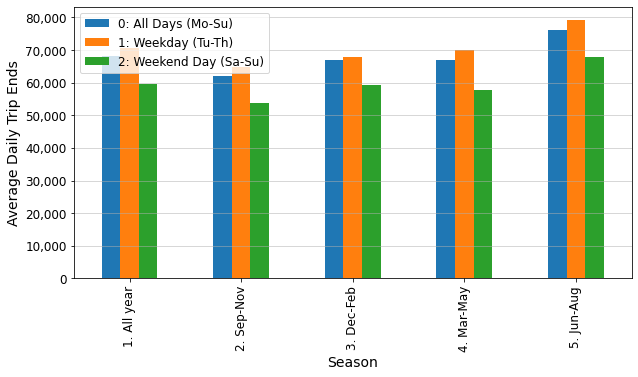

day_part,1: Early AM (12am-6am),2: Peak AM (6am-9am),3: Mid-Day (9am-3pm),4: Peak PM (3pm-6pm),5: Late PM (6pm-12am)
day_type,,,,,
0: All Days (Mo-Su),"6,800","9,800","24,500","10,700","16,300"
1: Weekday (Tu-Th),"6,800","10,200","25,600","11,300","16,600"
2: Weekend Day (Sa-Su),"6,000","8,300","21,300","9,100","15,100"


## Airport 1. All year Time of Day Distribution by Day of Week Group

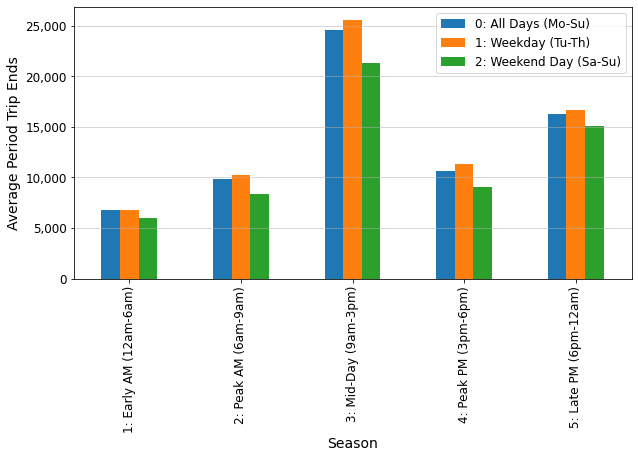

day_part,1: Early AM (12am-6am),2: Peak AM (6am-9am),3: Mid-Day (9am-3pm),4: Peak PM (3pm-6pm),5: Late PM (6pm-12am)
day_type,,,,,
0: All Days (Mo-Su),"5,700","9,200","22,600","10,000","14,400"
1: Weekday (Tu-Th),"6,000","9,600","23,800","10,700","14,700"
2: Weekend Day (Sa-Su),"4,800","7,700","19,300","8,300","13,500"


## Airport 2. Sep-Nov Time of Day Distribution by Day of Week Group

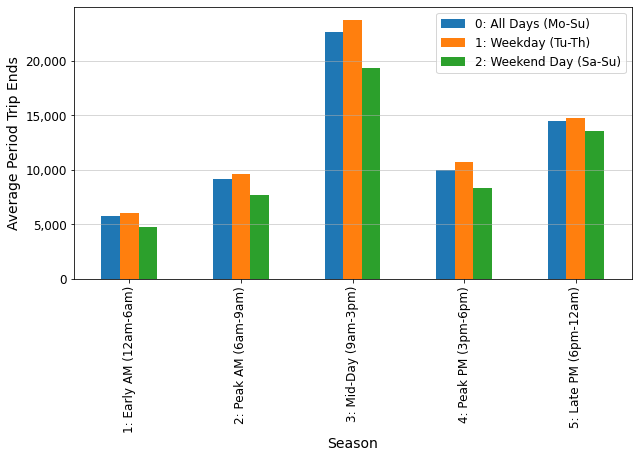

day_part,1: Early AM (12am-6am),2: Peak AM (6am-9am),3: Mid-Day (9am-3pm),4: Peak PM (3pm-6pm),5: Late PM (6pm-12am)
day_type,,,,,
0: All Days (Mo-Su),"6,500","9,700","24,800","10,400","15,500"
1: Weekday (Tu-Th),"6,300","10,100","25,300","10,700","15,400"
2: Weekend Day (Sa-Su),"6,100","8,200","21,700","8,900","14,200"


## Airport 3. Dec-Feb Time of Day Distribution by Day of Week Group

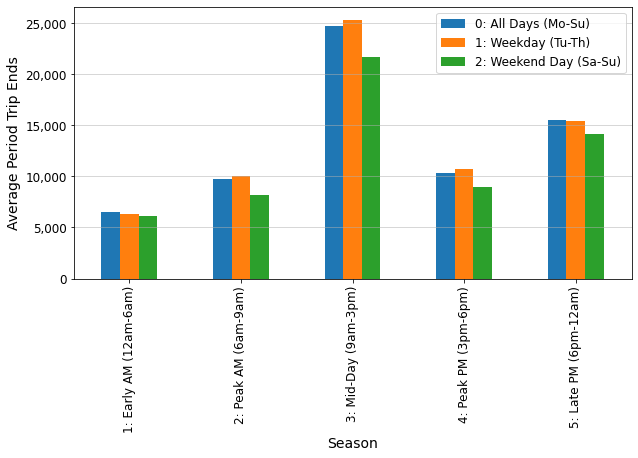

day_part,1: Early AM (12am-6am),2: Peak AM (6am-9am),3: Mid-Day (9am-3pm),4: Peak PM (3pm-6pm),5: Late PM (6pm-12am)
day_type,,,,,
0: All Days (Mo-Su),"7,000","9,500","23,600","10,400","16,500"
1: Weekday (Tu-Th),"7,100","10,000","24,800","11,000","17,300"
2: Weekend Day (Sa-Su),"6,100","7,800","20,200","8,900","14,800"


## Airport 4. Mar-May Time of Day Distribution by Day of Week Group

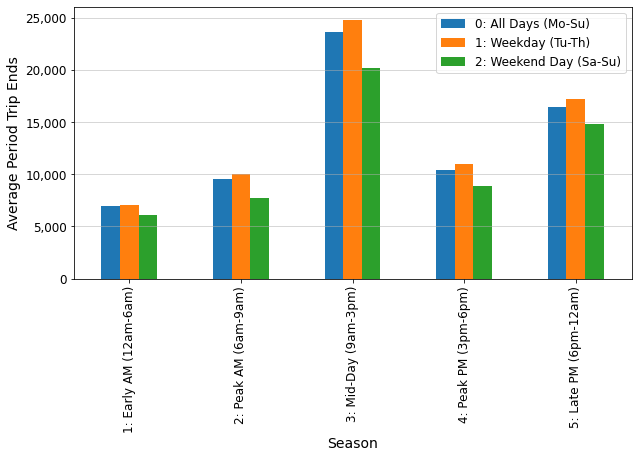

day_part,1: Early AM (12am-6am),2: Peak AM (6am-9am),3: Mid-Day (9am-3pm),4: Peak PM (3pm-6pm),5: Late PM (6pm-12am)
day_type,,,,,
0: All Days (Mo-Su),"7,800","10,900","27,100","11,800","18,700"
1: Weekday (Tu-Th),"7,900","11,100","28,400","12,900","19,100"
2: Weekend Day (Sa-Su),"6,800","9,600","23,700","10,000","17,600"


## Airport 5. Jun-Aug Time of Day Distribution by Day of Week Group

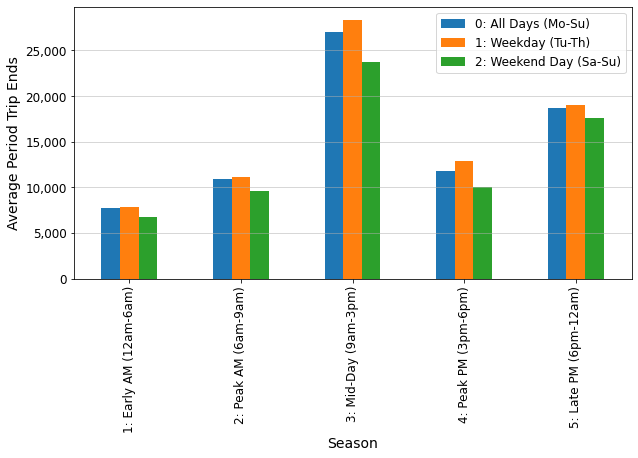

# Lagoon

## Lagoon Seasonality by Day of Week Group

data_period,1. All year,2. Sep-Nov,3. Dec-Feb,4. Mar-May,5. Jun-Aug
day_type,,,,,
0: All Days (Mo-Su),"10,100","9,100","1,400","7,500","22,300"
1: Weekday (Tu-Th),"6,800","2,800","1,700","4,100","18,600"
2: Weekend Day (Sa-Su),"15,200","18,200",600,"14,100","27,000"


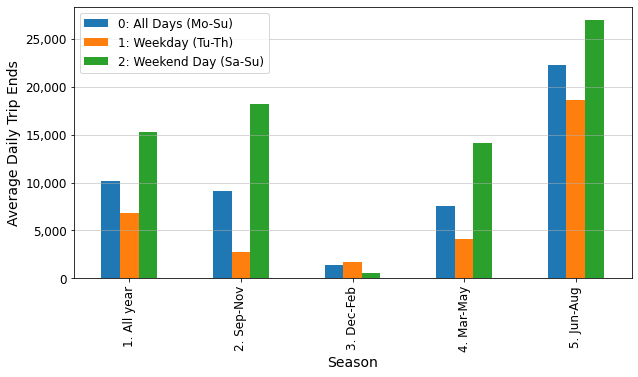

day_part,1: Early AM (12am-6am),2: Peak AM (6am-9am),3: Mid-Day (9am-3pm),4: Peak PM (3pm-6pm),5: Late PM (6pm-12am)
day_type,,,,,
0: All Days (Mo-Su),100,500,"4,000","2,400","3,200"
1: Weekday (Tu-Th),100,500,"2,700","1,700","1,800"
2: Weekend Day (Sa-Su),100,500,"6,400","3,400","4,800"


## Lagoon 1. All year Time of Day Distribution by Day of Week Group

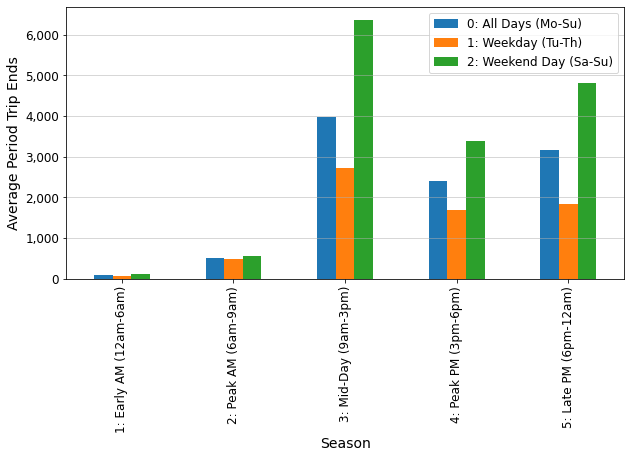

day_part,1: Early AM (12am-6am),2: Peak AM (6am-9am),3: Mid-Day (9am-3pm),4: Peak PM (3pm-6pm),5: Late PM (6pm-12am)
day_type,,,,,
0: All Days (Mo-Su),100,300,"3,000","2,300","3,400"
1: Weekday (Tu-Th),100,300,"1,100",800,600
2: Weekend Day (Sa-Su),100,500,"7,000","4,000","6,700"


## Lagoon 2. Sep-Nov Time of Day Distribution by Day of Week Group

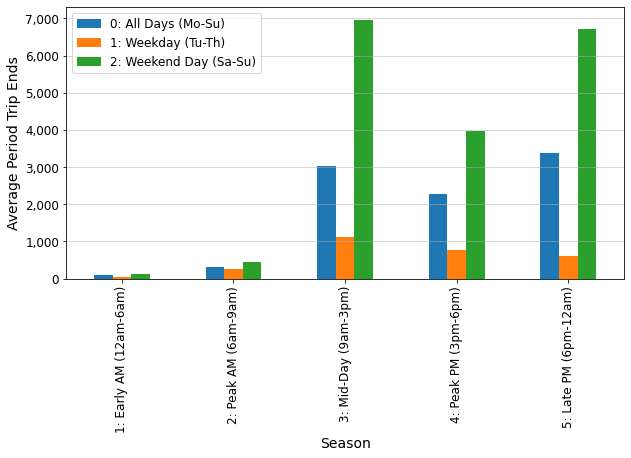

day_part,1: Early AM (12am-6am),2: Peak AM (6am-9am),3: Mid-Day (9am-3pm),4: Peak PM (3pm-6pm),5: Late PM (6pm-12am)
day_type,,,,,
0: All Days (Mo-Su),0,200,600,400,100
1: Weekday (Tu-Th),0,300,700,600,200
2: Weekend Day (Sa-Su),0,0,200,100,100


## Lagoon 3. Dec-Feb Time of Day Distribution by Day of Week Group

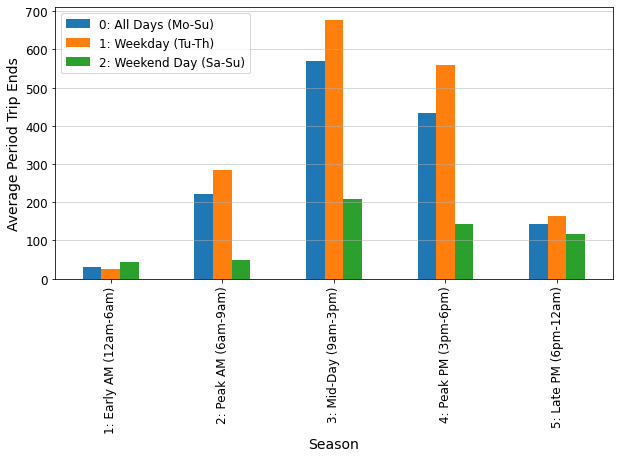

day_part,1: Early AM (12am-6am),2: Peak AM (6am-9am),3: Mid-Day (9am-3pm),4: Peak PM (3pm-6pm),5: Late PM (6pm-12am)
day_type,,,,,
0: All Days (Mo-Su),100,700,"3,100","2,200","1,500"
1: Weekday (Tu-Th),100,700,"1,500","1,400",400
2: Weekend Day (Sa-Su),100,700,"6,500","3,800","3,100"


## Lagoon 4. Mar-May Time of Day Distribution by Day of Week Group

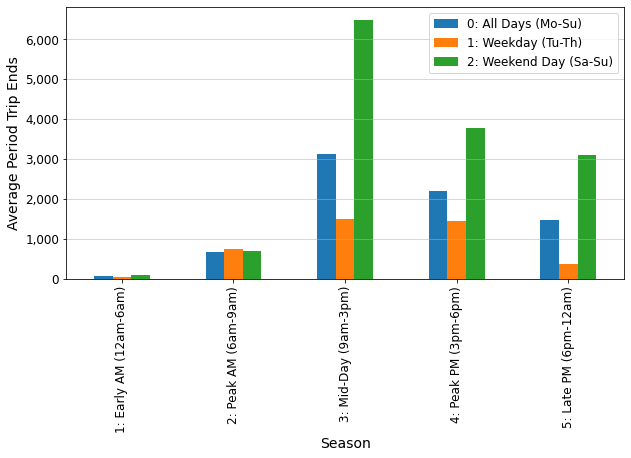

day_part,1: Early AM (12am-6am),2: Peak AM (6am-9am),3: Mid-Day (9am-3pm),4: Peak PM (3pm-6pm),5: Late PM (6pm-12am)
day_type,,,,,
0: All Days (Mo-Su),100,800,"9,100","4,600","7,600"
1: Weekday (Tu-Th),100,700,"7,600","4,000","6,200"
2: Weekend Day (Sa-Su),200,"1,000","11,400","5,500","9,000"


## Lagoon 5. Jun-Aug Time of Day Distribution by Day of Week Group

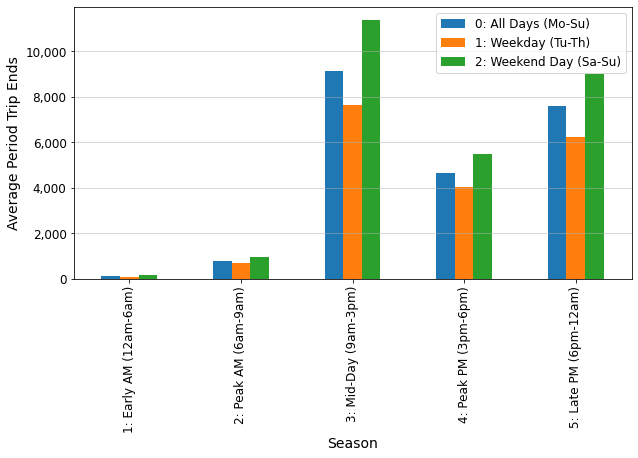

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


def custom_round(x, base=5):
    return base * round(x/base)

#only include daily totals
dfSLDailyTotals = dfSLDataAgg[(dfSLDataAgg['day_part']==daypart0)].copy()
#dfSLSeason['Volume'] = dfSLSeason['Volume'].astype('int64')

#create data for each special generator
for sg in dfSLDataAgg['SpecGen'].unique():
    
    display(Markdown("# " + sg))

    display(Markdown("## " + sg + " Seasonality by Day of Week Group"))

    dfSLDailyTotalsTable = dfSLDailyTotals[dfSLDailyTotals['SpecGen']==sg].copy()

    dfSLDailyTotalsTable = pd.pivot_table(dfSLDailyTotalsTable, values='Volume', index=['day_type'], columns=['data_period'], aggfunc=np.sum)

    display(dfSLDailyTotalsTable.apply(lambda x: custom_round(x, base=100)))

    ax = dfSLDailyTotalsTable.T.plot.bar(figsize=(10,5), fontsize=12);
    ax.grid('on', which='major', axis='y', linestyle='-', linewidth=0.5)
    ax.legend(prop=dict(size=12));
    ax.set_xlabel('Season', fontsize=14)
    ax.set_ylabel('Average Daily Trip Ends', fontsize=14)
    ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

    plt.show();

    #time of day volumes, don't show daily totals
    dfSLTimeOfDayVolumes = dfSLDataAgg[(dfSLDataAgg['day_part']!=daypart0)].copy()

    for ssn in dfSLDataAgg['data_period'].unique():
        #print(ssn)

        dfSLTimeOfDayVolumesTable = dfSLTimeOfDayVolumes[(dfSLTimeOfDayVolumes['SpecGen']==sg) & (dfSLTimeOfDayVolumes['data_period']==ssn)]

        dfSLTimeOfDayVolumesTable = pd.pivot_table(dfSLTimeOfDayVolumesTable, values='Volume', index=['day_type'], columns=['day_part'], aggfunc=np.sum)

        display(dfSLTimeOfDayVolumesTable.apply(lambda x: custom_round(x, base=100)))

        ax2 = dfSLTimeOfDayVolumesTable.T.plot.bar(figsize=(10,5), fontsize=12);
        ax2.grid('on', which='major', axis='y', linestyle='-', linewidth=0.5)
        ax2.legend(prop=dict(size=12));
        ax2.set_xlabel('Season', fontsize=14)
        ax2.set_ylabel('Average Period Trip Ends', fontsize=14)
        ax2.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

        display(Markdown("## " + sg + " " + ssn + " Time of Day Distribution by Day of Week Group"))

        plt.show();